I wanted to determine if changing the header in the home page form Hello to Sup!! made a diference on the probability that the user would sign up

We will utilize traditional a/b testing to perform analysis and calcude how our app should look.

We decided to use the metric CTR(click through rate) for people that after opening the app would decide to sign up or leave

Note:User might click many times since our app does not load fast so to account for that we would use click throug probability wich is matching each user with their clicks and record at most one of the click of that user.

In [334]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud 

In [355]:
import scipy.stats as scs


def generate_data1(N_A, N_B, p_A, p_B, days=None, control_label='A',
                  test_label='B'):
    """Returns a pandas dataframe with fake CTR data
    Example:
    Parameters:
        N_A (int): sample size for control group
        N_B (int): sample size for test group
            Note: final sample size may not match N_A provided because the
            group at each row is chosen at random (50/50).
        p_A (float): conversion rate; conversion rate of control group
        p_B (float): conversion rate; conversion rate of test group
        days (int): optional; if provided, a column for 'ts' will be included
            to divide the data in chunks of time
            Note: overflow data will be included in an extra day
        control_label (str)
        test_label (str)
    Returns:
        df (df)
    """

    # initiate empty container
    data = []

    # total amount of rows in the data
    N = N_A + N_B

    group_bern = scs.bernoulli(0.5)

    # initiate bernoulli distributions to randomly sample from
    A_bern = scs.bernoulli(p_A)
    B_bern = scs.bernoulli(p_B)

    for idx in range(N):
        # initite empty row
        row = {}
        # for 'ts' column
        if days is not None:
            if type(days) == int:
                row['ts'] = idx // (N // days)
            else:
                raise ValueError("Provide an integer for the days parameter.")
        # assign group based on 50/50 probability
        row['group'] = group_bern.rvs()

        if row['group'] == 0:
            # assign conversion based on provided parameters
            row['converted'] = A_bern.rvs()
        else:
            row['converted'] = B_bern.rvs()
        # collect row into data container
        data.append(row)

    # convert data into pandas dataframe
    df = pd.DataFrame(data)

    # transform group labels of 0s and 1s to user-defined group labels
    df['group'] = df['group'].apply(
        lambda x: control_label if x == 0 else test_label)

    return df



In [356]:
bcrA = 0.10  # conversion rate
bcrB = 0.12  # conversion rate

# A is control; B is test
N_A = 2000
N_B = 2000

ab_data = generate_data1(N_A, N_B, bcrA, bcrB)


In [357]:
ab_data.head()


,converted,group
0,0,A
1,0,A
2,1,B
3,0,A
4,0,A


In [358]:
ab_summary = ab_data.pivot_table(values='converted', index='group', aggfunc=np.sum)
ab_summary

,converted
group,
A,207
B,254


In [359]:
ab_summary["new"]=2000
ab_summary

,converted,new
group,,
A,207,2000
B,254,2000


In [360]:
ab_summary["convertion rate"]=ab_summary["converted"]/ab_summary["new"]
ab_summary


,converted,new,convertion rate
group,,,
A,207,2000,0.1035
B,254,2000,0.1270


now to have  better picture of our data we will plot the binomial distribution of each 
the MLE of p=num/p and the stndar deviation would be =p(1=p)/n so
For Group A:

In [361]:
P_ofA=ab_summary["converted"][0]/N_A
print(P_ofA)

P_ofB=ab_summary["converted"][1]/N_B
print(P_ofB)


0.1035
0.127


In [362]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as scs

Text(0, 0.5, 'probability')

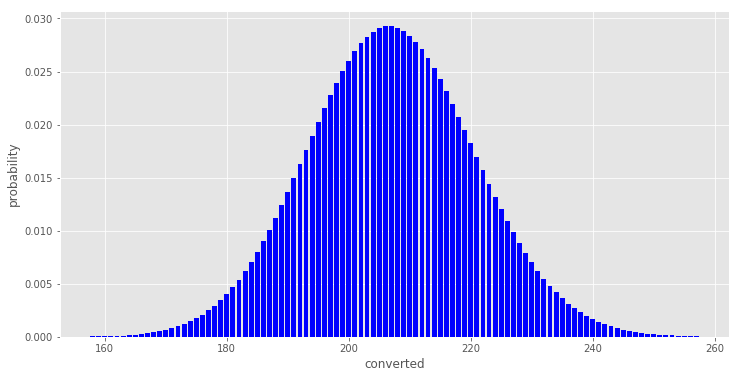

In [363]:
fig, ax = plt.subplots(figsize=(12,6))
x = np.linspace(ab_summary["converted"][0]-49, ab_summary["converted"][0]+50, 100)
y = scs.binom(2000, P_ofA).pmf(x)
ax.bar(x, y,color='blue')
plt.xlabel('converted')
plt.ylabel('probability')

Text(0, 0.5, 'probability')

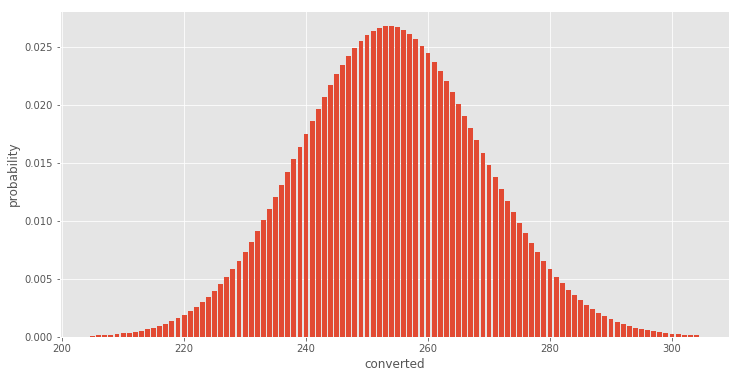

In [364]:
fig, ax = plt.subplots(figsize=(12,6))
x = np.linspace(ab_summary["converted"][1]-49, ab_summary["converted"][1]+50, 100)
y = scs.binom(2000, P_ofB).pmf(x)
ax.bar(x, y)
plt.xlabel('converted')
plt.ylabel('probability')

Text(0, 0.5, 'probability')

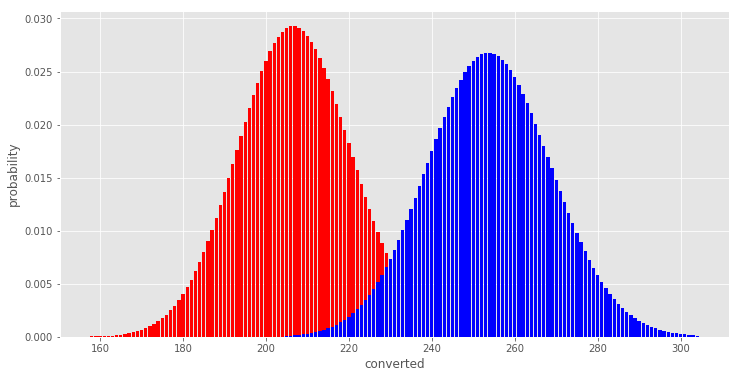

In [389]:
fig, ax = plt.subplots(figsize=(12,6))
xA = np.linspace(ab_summary["converted"][0]-49, ab_summary["converted"][0]+50, 100)
yA = scs.binom(2000, P_ofA).pmf(xA)
ax.bar(xA, yA,color='red')
xB = np.linspace(ab_summary["converted"][1]-49, ab_summary["converted"][1]+50, 100)
yB = scs.binom(2000, P_ofB).pmf(xB)
ax.bar(xB, yB,color='blue')
plt.xlabel('converted')
plt.ylabel('probability')

We can see that the distributions are different however we need to be certain about it(could happen by chance).

The null hypotesis is that these 2 distributions have the same conversion rate. Therefore, we want to be able to 
reject this hypotesis
H0: p1!=p2
    
Now that we have estimated the probalbities for each p1 and p2 which represent thte convertion rates we can 
get the distribution for each p

Each distribution folows a bernulie distrbiution
    Extected value=p and variance =p(1-p)

we are trying see if  h0: p1=p2 or in other words h0:d=p1-p2=0
    
    
To perform this test, assuming we have a large data set, we can utilize CLT , this would tell us that the true mean of each p would have a normal distribution(u=p, sqrt((p(1-p))/n))

We got this parameters(u) by deriving the MLE of the bernulie distribution with respect of p and then equal it to 0
To get the variance the proces was similar. We derived the second momentum based on p and that gave us the unbiase estimate for the variance

Now that we have p1 and p2 and their distributions we can perform out statistical analysis to test if there is a diference betweeen the means of p1 and p2

To do this test we need to consider both sd so first we need to find the distribution of d which is pA-pB

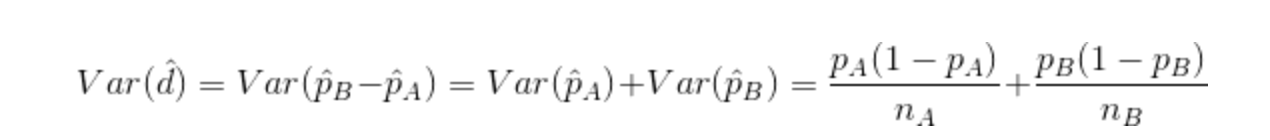
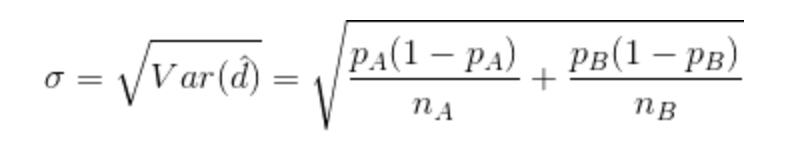
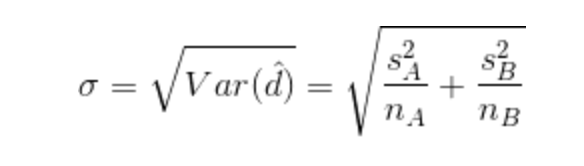

Other way is to get the pool standar deviation.

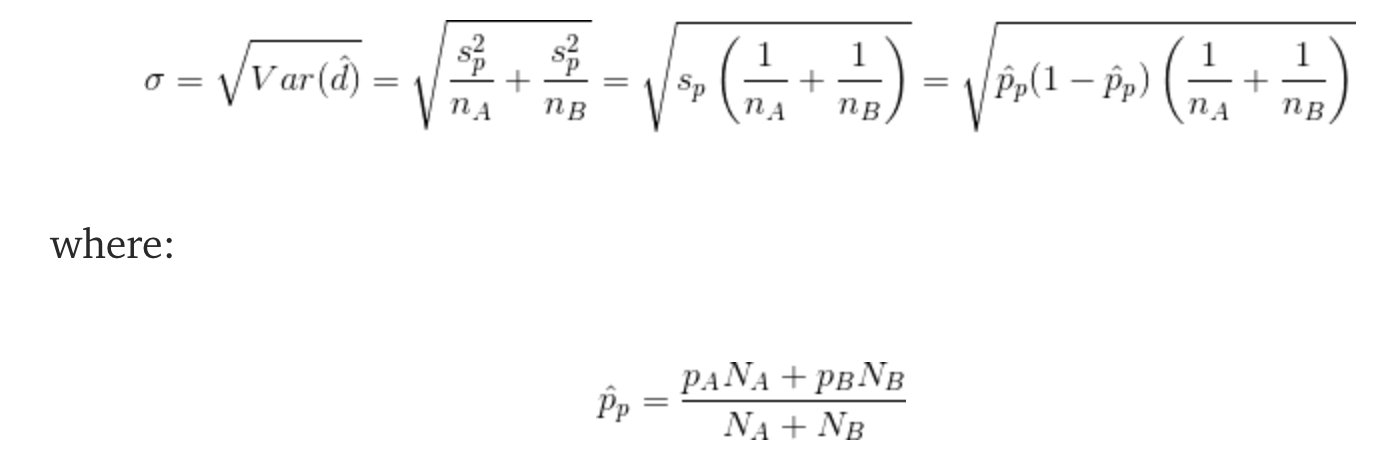

In [ ]:
both ways should work:
So now that we have our normal distribition of d is ime to do the hypotesis testing h0:d=0
so we can get our confiidence intervalu for 95% confidence interval so
mean+-1.96*SD

In [370]:
X_A = bcr * N_A
X_B = (bcr + d_hat) * N_B
stderr = pooled_SE(N_A, N_B, X_A, X_B)
stderr

0.009914118720289767

so The CI

In [385]:
(P_ofA-P_ofB)+1.96*stderr

-0.00955259951101999

In [386]:
(P_ofA-P_ofB)-1.96*stderr

-0.03744740048898002

Since we do not have 0 in the 95% CI we can reject the null and therefore say that there is a statistical significance

Note:Power needs to be consider when arriving to a conclusion(further analisys might be nesessary)

    
We can utilize this code to perfom more test that will help us adjust how our instagram app would look like and make some changes to increase the amount of users that sign up once they are in the main page

referece:
    https://en.wikipedia.org/wiki/Bernoulli_distribution
    http://www.stat.yale.edu/Courses/1997-98/101/binom.htm
    https://www.youtube.com/watch?v=ESKpJi2vLCw
    https://newonlinecourses.science.psu.edu/stat414/node/191/
    https://newonlinecourses.science.psu.edu/stat414/node/179/
    https://www.quora.com/What-is-the-best-book-on-A-B-testing
    https://classroom.udacity.com/courses/ud257/lessons/4001558669/concepts/39700990240923